In [29]:
emci<-readr::read_csv("/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/lana_request/EMCI_limma.csv")
lmci<-readr::read_csv("/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/lana_request/LMCI_limma.csv")

New names:
• `` -> `...1`
Rows: 16 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): ...1, metab_symbol, diffexpressed, delabel
dbl (6): logFC, AveExpr, t, P.Value, adj.P.Val, B

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 25 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): ...1, metab_symbol, diffexpressed, delabel
dbl (6): logFC, AveExpr, t, P.Value, adj.P.Val, B

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [30]:
emci$delabel
lmci$delabel

[1] "PC(O-42:2)"                            
 [2] "PC(O-42:3)"                            
 [3] "PC(O-44:3)"                            
 [4] "SM(d18:1/16:0)"                        
 [5] NA                                      
 [6] NA                                      
 [7] NA                                      
 [8] NA                                      
 [9] NA                                      
[10] NA                                      
[11] NA                                      
[12] "L-Tryptophan"                          
[13] NA                                      
[14] NA                                      
[15] "3-Hydroxy-cis-5-tetradecenoylcarnitine"
[16] "Histidine"

[1] "PC(16:0/16:0)"                         
 [2] NA                                      
 [3] NA                                      
 [4] "PC(16:1(9Z)/P-18:1(11Z))"              
 [5] "Propenoylcarnitine"                    
 [6] NA                                      
 [7] NA                                      
 [8] NA                                      
 [9] "PC(o-22:0/22:6(4Z,7Z,10Z,13Z,16Z,19Z))"
[10] NA                                      
[11] NA                                      
[12] NA                                      
[13] NA                                      
[14] NA                                      
[15] NA                                      
[16] NA                                      
[17] "PC(o-16:0/22:0)"                       
[18] NA                                      
[19] NA                                      
[20] "lysoPC(28:0)"                          
[21] "LysoPC(18:0)"                          
[22] NA                                      
[23] "LysoPC(16:0)"                          
[24] NA                                      
[25] NA

In [31]:
length(emci$delabel)
length(lmci$delabel)

[1] 16

[1] 25

In [23]:
all<-readr::read_csv("/nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/lana_request/All_limma.csv")

New names:
• `` -> `...1`
Rows: 17 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): ...1, metab_symbol, diffexpressed, delabel
dbl (6): logFC, AveExpr, t, P.Value, adj.P.Val, B

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
# Get unique metabolites from each dataframe
unique_emci <- unique(emci$metab_symbol)
unique_lmci <- unique(lmci$metab_symbol)

# Find total unique metabolites across both datasets
all_unique_metabolites <- unique(c(unique_emci, unique_lmci))

# Count the total number of unique metabolites
num_unique_metabolites <- length(all_unique_metabolites)

# Print the result
cat("Total unique metabolites across emci and lmci:", num_unique_metabolites, "\n")


Total unique metabolites across emci and lmci: 30 


In [10]:
all_unique_metabolites 

[1] "HMDB00564" "HMDB13124" "HMDB13464" "HMDB13408" "HMDB13450" "HMDB08029"
 [7] "HMDB10386" "HMDB08055" "HMDB10393" "HMDB29206" "HMDB10383" "HMDB00929"
[13] "HMDB10382" "HMDB10384" "HMDB13330" "HMDB00177" "HMDB00562" "HMDB00641"
[19] "HMDB06469" "HMDB00191" "HMDB13332" "HMDB00651" "HMDB02250" "HMDB00848"
[25] "HMDB00222" "HMDB00201" "HMDB00791" "HMDB00159" "HMDB02013" "HMDB00167"

In [11]:
# Define stored metabolites
down_metabolites <- c("HMDB10393", "HMDB00929", "HMDB0000517", "HMDB0000870", 
                      "HMDB08055", "HMDB10384", "HMDB11481")

up_metabolites <- c("HMDB00222", "HMDB00848", "HMDB06469", "HMDB00562", 
                    "HMDB00201", "HMDB13332", "HMDB13331", "HMDB13330", 
                    "HMDB00651", "HMDB02250", "HMDB00791")

# Function to find intersections and annotate up/down status
analyze_metabolites <- function(df, name) {
  df$stored_status <- ifelse(df$metab_symbol %in% down_metabolites, "Down",
                             ifelse(df$metab_symbol %in% up_metabolites, "Up", NA))
  
  # Filter only metabolites found in stored lists
  df_filtered <- df[!is.na(df$stored_status), ]
  
  # Select relevant columns
  df_result <- df_filtered[, c("metab_symbol", "stored_status", "diffexpressed")]
  
  # Print summary
  cat("\n", "=== Analysis for", name, "===\n")
  print(table(df_result$stored_status, df_result$diffexpressed, useNA = "ifany"))
  
  return(df_result)
}


In [12]:
# Perform analysis on emci and lmci
emci_result <- analyze_metabolites(emci, "emci")
lmci_result <- analyze_metabolites(lmci, "lmci")

emci_result
lmci_result


 === Analysis for emci ===
      
       UP
  Down  4
  Up    1

 === Analysis for lmci ===
      
       DOWN UP
  Down    1  1
  Up      0 10


metab_symbol,stored_status,diffexpressed
<chr>,<chr>,<chr>
HMDB08055,Down,UP
HMDB10393,Down,UP
HMDB00929,Down,UP
HMDB10384,Down,UP
HMDB13330,Up,UP


metab_symbol,stored_status,diffexpressed
<chr>,<chr>,<chr>
HMDB00562,Up,UP
HMDB06469,Up,UP
HMDB13330,Up,UP
HMDB08055,Down,UP
HMDB13332,Up,UP
HMDB00651,Up,UP
HMDB02250,Up,UP
HMDB00848,Up,UP
HMDB00222,Up,UP


In [13]:
# Combine unique metab_symbol from emci_result and lmci_result
unique_metabolites <- unique(c(emci_result$metab_symbol, lmci_result$metab_symbol))

# Count the number of unique metabolites
num_unique_metabolites <- length(unique_metabolites)

# Print the result
cat("Total unique metabolites in combined emci_result and lmci_result:", num_unique_metabolites, "\n")

# Print the list of unique metabolites
print(unique_metabolites)


Total unique metabolites in combined emci_result and lmci_result: 14 
 [1] "HMDB08055" "HMDB10393" "HMDB00929" "HMDB10384" "HMDB13330" "HMDB00562"
 [7] "HMDB06469" "HMDB13332" "HMDB00651" "HMDB02250" "HMDB00848" "HMDB00222"
[13] "HMDB00201" "HMDB00791"


In [14]:
rm(list=ls())

library(readr)
EFIGA <- read_csv("/nfs/dcmb-lgarmire/boweil/EFIGA/refined_EFIGA_data.csv")

EFIGA<-as.data.frame(EFIGA)
rownames(EFIGA) <- EFIGA$...1
data_2 <- EFIGA[, -c(1, (ncol(EFIGA)-1), ncol(EFIGA))]

colnames(data_2) <- ifelse(
  nchar(colnames(data_2)) > 9, 
  gsub("^HMDB00", "HMDB", colnames(data_2)), 
  colnames(data_2)
)


New names:
• `` -> `...1`
Rows: 166 Columns: 57
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): labels_matching_UC_big, labels_matching_EMCI
dbl (55): ...1, HMDB0000062, HMDB0000651, HMDB0006469, HMDB0002250, HMDB1333...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [15]:
ADNI <- read_csv("/nfs/dcmb-lgarmire/boweil/EFIGA/transfer_me/labeled_ADNI.csv")
ADNI <- as.data.frame(ADNI)
rownames(ADNI) <- ADNI$...1
data_1 <- ADNI[, -c(1, ncol(ADNI))]
colnames(data_1) <- ifelse(
  nchar(colnames(data_1)) > 9, 
  gsub("^HMDB00", "HMDB", colnames(data_1)), 
  colnames(data_1)
)


New names:
• `` -> `...1`
Rows: 401 Columns: 56
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ...1, subtype_big
dbl (54): HMDB0000062, HMDB0000651, HMDB0006469, HMDB0002250, HMDB13330, HMD...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [16]:
head(data_1)
head(data_2)

,HMDB00062,HMDB00651,HMDB06469,HMDB02250,HMDB13330,HMDB13331,HMDB13332,HMDB00222,HMDB00848,HMDB00201,⋯,HMDB00159,HMDB00162,HMDB62263,HMDB00167,HMDB00929,HMDB02141,HMDB00562,HMDB00870,HMDB00684,HMDB00725
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
002_S_0729,0.2069035,0.09234267,-0.5514594,0.1942219,1.12554032,0.7957516,-1.332563637,0.75878529,0.3975081,2.90384040,⋯,-1.2739142,-0.5558106,-0.97469682,0.08213429,-0.98409247,-1.12444576,-0.6231567,0.5381524,-0.2859234,-0.47891182
002_S_1155,-0.3583294,-1.45403340,-0.8223492,-2.6400517,-2.39538790,-0.3229225,-1.588949209,-1.28754808,-0.8856425,-1.50791878,⋯,-0.6747287,0.3656282,-1.83062953,0.67693813,-0.01881684,0.85343035,-0.9037180,0.5594153,-0.8592163,0.68845469
002_S_1268,1.5364776,-1.49052894,-0.8851308,-2.3518800,-2.85825273,-1.1335259,-1.098501947,-2.08612683,-1.5107466,-0.73380001,⋯,-0.3266152,1.7972697,-1.43420671,0.11462459,0.25010214,0.92459416,0.1028415,0.5405715,1.7762427,2.66604310
002_S_2043,1.3893323,-0.50046573,0.6603943,-0.6097003,0.02409985,-0.5370718,-0.005598924,0.04973967,-0.1342668,0.01508883,⋯,0.4122004,0.7554066,-0.27419120,-0.32539430,0.54635213,0.02258693,0.1800198,-1.8960533,0.6531801,0.05930034
002_S_2073,1.0606933,0.43789819,0.9354426,0.9031513,0.09142729,0.5144346,0.792180818,-0.21236054,-0.0691702,0.54485664,⋯,0.1126143,-0.7753698,-0.07650061,-1.46556907,-0.63213819,-0.34826110,0.3713776,0.4267633,0.4008867,-1.02277553
002_S_4171,0.4390318,1.67750403,0.9763984,1.8469322,1.95348670,1.2301700,1.085107273,0.91638279,0.5410171,0.27266910,⋯,-1.3165648,0.5499586,-0.77347844,-0.12921674,-1.21139940,-1.01644973,0.5947069,0.4956343,-0.3720931,-1.38892456


,HMDB00062,HMDB00651,HMDB06469,HMDB02250,HMDB13330,HMDB13331,HMDB13332,HMDB00222,HMDB00848,HMDB00201,⋯,HMDB00159,HMDB00162,HMDB62263,HMDB00167,HMDB00929,HMDB02141,HMDB00562,HMDB00870,HMDB00684,HMDB00725
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
90271,-0.3422958,0.9397381968,-0.485480637,0.72524441,0.8876414,0.6567117,0.9113069,0.06056719,0.24559547,-0.2012459,⋯,1.23157616,0.22808442,0.06056719,-1.508013268,1.0940684,0.564310895,0.23685580,0.29124076,0.2017683,-0.6512363
90347,-0.5076514,-1.1893831168,0.309898817,-1.52017547,-1.0834927,-1.0759057,-0.3615049,-0.65123631,-0.02813147,-1.8322045,⋯,-0.04263418,0.65671173,-0.26223063,0.681122241,0.6403427,0.122590338,0.38260243,0.46377237,-0.6463866,0.1065192
90349,0.4689118,0.0670206931,-0.003930137,0.02146389,0.2635942,-0.7141899,-1.0628349,0.36371206,0.54471019,0.7900282,⋯,-0.28601146,1.41157530,0.61872600,-0.022513859,-0.9606489,-0.799020110,-1.18938312,-0.46687725,-0.9546724,1.2315762
90359,-1.0628349,0.1807548490,1.616757196,-0.07624525,0.3863476,0.5328667,-0.1392117,0.42523124,1.18068572,-0.1020928,⋯,-0.56843335,0.08204292,-1.88843507,-1.283151884,-0.9664133,-0.006613584,0.53638621,-1.40198857,0.2256082,-1.9144518
90360,-1.4552332,-1.1015050207,0.321013578,-0.82857650,-0.4720399,-0.2665585,-0.3486168,0.74810131,0.20176828,-1.0507987,⋯,1.27832565,1.46926290,0.65671173,0.499557027,0.2486078,2.149987071,-0.15537243,-0.07034728,-0.2354990,-0.2778219
8530,-0.2665585,-0.0008808177,0.734502555,0.64853463,1.0577635,0.7094580,0.5399471,0.78246191,1.10796830,-0.4554494,⋯,0.16395551,-0.23860229,0.22020776,-0.003930137,0.9632878,-0.511795271,0.07858089,-1.72102659,-0.2548321,-0.9096602


In [17]:
# Define the HMDB IDs to keep
hmdb_ids <- c("HMDB08055", "HMDB10393", "HMDB00929", "HMDB10384", "HMDB13330", 
              "HMDB00562", "HMDB06469", "HMDB13332", "HMDB00651", "HMDB02250", 
              "HMDB00848", "HMDB00222", "HMDB00201", "HMDB00791")

# Filter columns in data_1 and data_2
filtered_data_1 <- data_1[, colnames(data_1) %in% hmdb_ids]
filtered_data_2 <- data_2[, colnames(data_2) %in% hmdb_ids]

# View filtered data dimensions
cat("Filtered data_1 dimensions:", dim(filtered_data_1), "\n")
cat("Filtered data_2 dimensions:", dim(filtered_data_2), "\n")

# Show the first few columns of filtered data
head(filtered_data_1)
head(filtered_data_2)


Filtered data_1 dimensions: 401 14 
Filtered data_2 dimensions: 166 14 


,HMDB00651,HMDB06469,HMDB02250,HMDB13330,HMDB13332,HMDB00222,HMDB00848,HMDB00201,HMDB00791,HMDB10384,HMDB10393,HMDB08055,HMDB00929,HMDB00562
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
002_S_0729,0.09234267,-0.5514594,0.1942219,1.12554032,-1.332563637,0.75878529,0.3975081,2.90384040,0.2037460,0.7653750,0.76970970,2.05612726,-0.98409247,-0.6231567
002_S_1155,-1.45403340,-0.8223492,-2.6400517,-2.39538790,-1.588949209,-1.28754808,-0.8856425,-1.50791878,-1.0698054,0.4238098,0.55492431,-0.03411258,-0.01881684,-0.9037180
002_S_1268,-1.49052894,-0.8851308,-2.3518800,-2.85825273,-1.098501947,-2.08612683,-1.5107466,-0.73380001,-0.9993331,-0.1838867,-0.01468465,-0.22049714,0.25010214,0.1028415
002_S_2043,-0.50046573,0.6603943,-0.6097003,0.02409985,-0.005598924,0.04973967,-0.1342668,0.01508883,-0.0605980,0.1107994,1.03468376,1.73934154,0.54635213,0.1800198
002_S_2073,0.43789819,0.9354426,0.9031513,0.09142729,0.792180818,-0.21236054,-0.0691702,0.54485664,0.2902952,-0.3606529,0.83812263,0.13957413,-0.63213819,0.3713776
002_S_4171,1.67750403,0.9763984,1.8469322,1.95348670,1.085107273,0.91638279,0.5410171,0.27266910,1.0679700,-0.8338861,-1.67845153,0.45277779,-1.21139940,0.5947069


,HMDB00651,HMDB06469,HMDB02250,HMDB13330,HMDB13332,HMDB00222,HMDB00848,HMDB00201,HMDB00791,HMDB10384,HMDB10393,HMDB08055,HMDB00929,HMDB00562
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
90271,0.9397381968,-0.485480637,0.72524441,0.8876414,0.9113069,0.06056719,0.24559547,-0.2012459,0.9453178,-0.14166380,1.16023255,-1.24448381,1.0940684,0.23685580
90347,-1.1893831168,0.309898817,-1.52017547,-1.0834927,-0.3615049,-0.65123631,-0.02813147,-1.8322045,-1.1223338,0.75269360,0.01835202,-0.03959911,0.6403427,0.38260243
90349,0.0670206931,-0.003930137,0.02146389,0.2635942,-1.0628349,0.36371206,0.54471019,0.7900282,0.1037438,0.35422211,0.22560819,0.41925143,-0.9606489,-1.18938312
90359,0.1807548490,1.616757196,-0.07624525,0.3863476,-0.1392117,0.42523124,1.18068572,-0.1020928,0.2368558,0.11611658,0.01155726,-2.22799503,-0.9664133,0.53638621
90360,-1.1015050207,0.321013578,-0.82857650,-0.4720399,-0.3486168,0.74810131,0.20176828,-1.0507987,-0.8702201,0.65671173,0.52206336,-0.02251386,0.2486078,-0.15537243
8530,-0.0008808177,0.734502555,0.64853463,1.0577635,0.5399471,0.78246191,1.10796830,-0.4554494,-0.3757379,-0.04907824,-0.10514326,-0.18580290,0.9632878,0.07858089


In [18]:
# Create a named vector where names are the HMDB IDs and the values are the metabolite names.
metabolite_mapping <- c(
  "HMDB00651" = "Lauroylcarnitine",
  "HMDB06469" = "C is, C is-9,12-Octadecadienoyl-L-Carnitine",
  "HMDB02250" = "L-Octanoylcarnitine",
  "HMDB13330" = "3-Hydroxy-cis-5-tetradecenoylcarnitine",
  "HMDB13332" = "3-Hydroxy-5 8-tetradecadiencarnitine",
  "HMDB00222" = "Palmitoyl-DL-Carnitine",
  "HMDB00848" = "Stearoylcarnitine",
  "HMDB00201" = "Acetylcarnitine(O-Acetylcarnitine)",
  "HMDB00791" = "Decanoylcarnitine",
  "HMDB10384" = "18:0 Lyso Pc",
  "HMDB10393" = "Lyso PC(20:3(5Z8Z11Z))",
  "HMDB08055" = "PC(18:022:5(4Z7Z10Z13Z16Z))",
  "HMDB00929" = "Tryptophan",
  "HMDB00562" = "Creatinine"
)

# Function to rename columns using the mapping
rename_columns <- function(df, mapping) {
  new_names <- sapply(colnames(df), function(x) {
    if(x %in% names(mapping)) {
      mapping[[x]]
    } else {
      x
    }
  })
  colnames(df) <- new_names
  return(df)
}

# Apply renaming to filtered_data_1 and filtered_data_2
filtered_data_1 <- rename_columns(filtered_data_1, metabolite_mapping)
filtered_data_2 <- rename_columns(filtered_data_2, metabolite_mapping)

# Check the new column names
colnames(filtered_data_1)
colnames(filtered_data_2)


[1] "Lauroylcarnitine"                           
 [2] "C is, C is-9,12-Octadecadienoyl-L-Carnitine"
 [3] "L-Octanoylcarnitine"                        
 [4] "3-Hydroxy-cis-5-tetradecenoylcarnitine"     
 [5] "3-Hydroxy-5 8-tetradecadiencarnitine"       
 [6] "Palmitoyl-DL-Carnitine"                     
 [7] "Stearoylcarnitine"                          
 [8] "Acetylcarnitine(O-Acetylcarnitine)"         
 [9] "Decanoylcarnitine"                          
[10] "18:0 Lyso Pc"                               
[11] "Lyso PC(20:3(5Z8Z11Z))"                     
[12] "PC(18:022:5(4Z7Z10Z13Z16Z))"                
[13] "Tryptophan"                                 
[14] "Creatinine"

[1] "Lauroylcarnitine"                           
 [2] "C is, C is-9,12-Octadecadienoyl-L-Carnitine"
 [3] "L-Octanoylcarnitine"                        
 [4] "3-Hydroxy-cis-5-tetradecenoylcarnitine"     
 [5] "3-Hydroxy-5 8-tetradecadiencarnitine"       
 [6] "Palmitoyl-DL-Carnitine"                     
 [7] "Stearoylcarnitine"                          
 [8] "Acetylcarnitine(O-Acetylcarnitine)"         
 [9] "Decanoylcarnitine"                          
[10] "18:0 Lyso Pc"                               
[11] "Lyso PC(20:3(5Z8Z11Z))"                     
[12] "PC(18:022:5(4Z7Z10Z13Z16Z))"                
[13] "Tryptophan"                                 
[14] "Creatinine"

In [32]:
# For data_2 using ADNI$subtype_big, first recode as before:
grouped_subtype <- ifelse(ADNI$subtype_big %in% c("EMCI1", "EMCI2"), "EMCI",
                   ifelse(ADNI$subtype_big %in% c("LMCI1", "LMCI2"), "LMCI", NA))
grouped_subtype <- factor(grouped_subtype)
print(levels(grouped_subtype))  # Expect "EMCI" and "LMCI"

# Calculate mean expression per metabolite for each group in data_2
mean_group_EMCI <- colMeans(filtered_data_2[grouped_subtype == "EMCI", ], na.rm = TRUE)
mean_group_LMCI <- colMeans(filtered_data_2[grouped_subtype == "LMCI", ], na.rm = TRUE)

# Compute log fold change as the difference in means
logFC_data2 <- mean_group_LMCI - mean_group_EMCI
logFC_data2_df <- data.frame(Metabolite = names(logFC_data2),
                             logFC_ADNI = logFC_data2,
                             stringsAsFactors = FALSE)

# For data_1 (using EFIGA$labels_matching_UC_big), do the same:
labels_data1 <- factor(EFIGA$labels_matching_UC_big)
group1_data1 <- levels(labels_data1)[1]  # first group
group2_data1 <- levels(labels_data1)[2]  # second group

mean_group1_data1 <- colMeans(filtered_data_1[labels_data1 == group1_data1, ], na.rm = TRUE)
mean_group2_data1 <- colMeans(filtered_data_1[labels_data1 == group2_data1, ], na.rm = TRUE)

# Compute log fold change as the difference in means
logFC_data1 <- mean_group2_data1 - mean_group1_data1
logFC_data1_df <- data.frame(Metabolite = names(logFC_data1),
                             logFC_EFIGA = logFC_data1,
                             stringsAsFactors = FALSE)

# Merge the results for side-by-side comparison
logFC_merged <- merge(logFC_data1_df, logFC_data2_df, by = "Metabolite", all = TRUE)
print(head(logFC_merged))



[1] "EMCI" "LMCI"
                                   Metabolite logFC_EFIGA logFC_ADNI
1                                18:0 Lyso Pc  0.13624965 -0.1020506
2        3-Hydroxy-5 8-tetradecadiencarnitine  0.01767884  0.3283159
3      3-Hydroxy-cis-5-tetradecenoylcarnitine  0.08387791  0.3258299
4          Acetylcarnitine(O-Acetylcarnitine) -0.02294403  0.2082715
5 C is, C is-9,12-Octadecadienoyl-L-Carnitine -0.04222485  0.1781987
6                                  Creatinine -0.02612567  0.2648360


In [33]:
logFC_merged

Metabolite,logFC_EFIGA,logFC_ADNI
<chr>,<dbl>,<dbl>
18:0 Lyso Pc,0.13624965,-0.1020506
3-Hydroxy-5 8-tetradecadiencarnitine,0.01767884,0.3283159
3-Hydroxy-cis-5-tetradecenoylcarnitine,0.08387791,0.3258299
Acetylcarnitine(O-Acetylcarnitine),-0.02294403,0.2082715
"C is, C is-9,12-Octadecadienoyl-L-Carnitine",-0.04222485,0.1781987
Creatinine,-0.02612567,0.2648360
Decanoylcarnitine,0.07884457,0.3603504
L-Octanoylcarnitine,0.09820552,0.3770442
Lauroylcarnitine,0.10311433,0.3856496


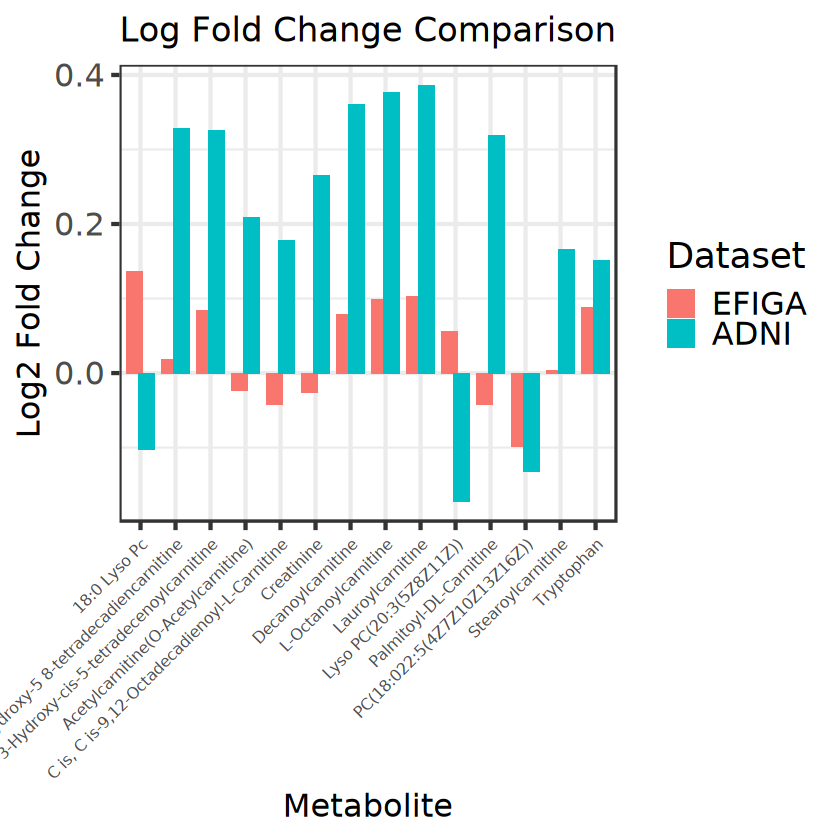

In [20]:
library(reshape2)
library(ggplot2)

# Melt the merged logFC data
logFC_long <- melt(logFC_merged, id.vars = "Metabolite", 
                   variable.name = "Dataset", value.name = "LogFC")
# Rename the Dataset factor levels for clarity
logFC_long$Dataset <- factor(logFC_long$Dataset,
                             levels = c("logFC_EFIGA", "logFC_ADNI"),
                             labels = c("EFIGA", "ADNI"))

# Create the plot and assign to variable 'p'
p <- ggplot(logFC_long, aes(x = Metabolite, y = LogFC, fill = Dataset)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7)) +
  theme_bw(base_size = 20) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
    axis.text.y = element_text(size = 19),
    axis.title = element_text(size = 19),
    plot.title = element_text(size = 20, hjust = 0.5),
    legend.title = element_text(size = 21),
    legend.text = element_text(size = 19)
  ) +
  labs(title = "Log Fold Change Comparison",
       y = "Log2 Fold Change",
       x = "Metabolite")

# Print the plot
print(p)

# Save the plot as a PNG file with specified dimensions and resolution
ggsave("logFC_comparison.png", plot = p, width = 12, height = 8, dpi = 600)


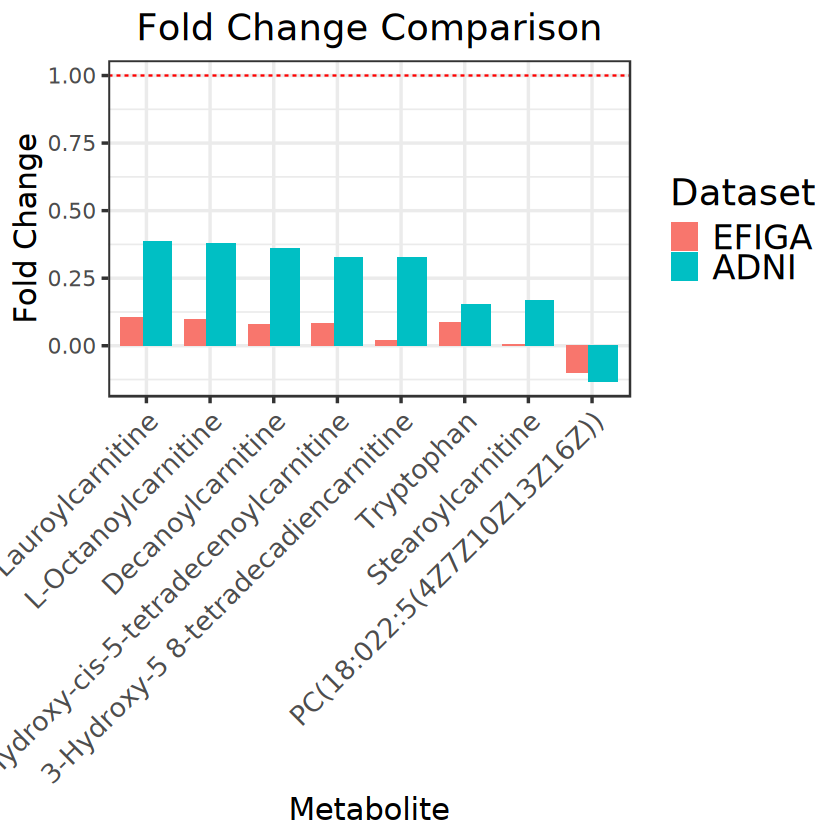

In [31]:
# Compute fold changes from log2 FC (no sign flip)
#foldChange_data2 <- 2^(logFC_data2)
#foldChange_data1 <- 2^(logFC_data1)
foldChange_data2 <- (logFC_data2)
foldChange_data1 <- (logFC_data1)

# Create data frames for each dataset
foldChange_data2_df <- data.frame(Metabolite = names(foldChange_data2),
                                  foldChange_ADNI = foldChange_data2,
                                  stringsAsFactors = FALSE)
foldChange_data1_df <- data.frame(Metabolite = names(foldChange_data1),
                                  foldChange_EFIGA = foldChange_data1,
                                  stringsAsFactors = FALSE)

# Merge the fold changes for side-by-side comparison
foldChange_merged <- merge(foldChange_data1_df, foldChange_data2_df, by = "Metabolite", all = TRUE)

# Create a "DirectionGroup" indicator:
# "Same direction" if both datasets are >1 (up) or both <1 (down); otherwise "Opposite direction"
foldChange_merged$DirectionGroup <- ifelse(
  (foldChange_merged$foldChange_EFIGA > 0 & foldChange_merged$foldChange_ADNI > 0) | 
  (foldChange_merged$foldChange_EFIGA < 0 & foldChange_merged$foldChange_ADNI < 0),
  "Same direction", "Opposite direction"
)

# Keep only metabolites with the same direction
foldChange_merged_same <- subset(foldChange_merged, DirectionGroup == "Same direction")

# Optionally, order the metabolites.
# For example, order by the average of the two fold changes (you can change this ordering as needed)
foldChange_merged_same$Average_FC <- rowMeans(foldChange_merged_same[, c("foldChange_EFIGA", "foldChange_ADNI")], na.rm = TRUE)
foldChange_merged_same <- foldChange_merged_same[order(-foldChange_merged_same$Average_FC), ]
foldChange_merged_same$Metabolite <- factor(foldChange_merged_same$Metabolite, levels = foldChange_merged_same$Metabolite)

# Melt the data for plotting (keeping only the fold change columns)
library(reshape2)
foldChange_long <- melt(foldChange_merged_same[, c("Metabolite", "foldChange_EFIGA", "foldChange_ADNI")],
                        id.vars = "Metabolite", variable.name = "Dataset", value.name = "FoldChange")

# Optionally, rename dataset factor levels for clarity
levels(foldChange_long$Dataset) <- c("EFIGA", "ADNI")

# Create the bar plot with a horizontal threshold line at 1
library(ggplot2)
p <- ggplot(foldChange_long, aes(x = Metabolite, y = FoldChange, fill = Dataset)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7)) +
  geom_hline(yintercept = 1, linetype = "dashed", color = "red") +
  theme_bw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 16),
    axis.title = element_text(size = 18),
    plot.title = element_text(size = 22, hjust = 0.5),
    legend.title = element_text(size = 22),
    legend.text = element_text(size = 20)
  ) +
  labs(title = "Fold Change Comparison",
       y = "Fold Change",
       x = "Metabolite")

# Display the plot
print(p)

ggsave("foldChange_comparison_same_direction.png", plot = p, width = 12, height = 8, dpi = 600)




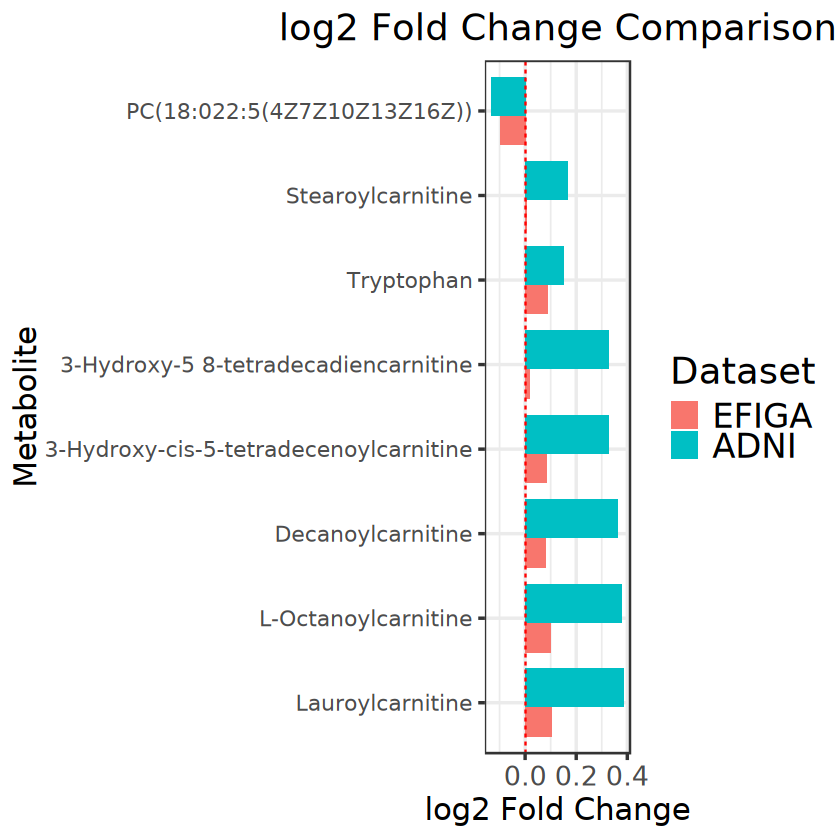

In [33]:
ggplot(foldChange_long, aes(x = Metabolite, y = FoldChange, fill = Dataset)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  theme_bw(base_size = 16) +
  theme(
    axis.text.x = element_text(size = 16),
    axis.title = element_text(size = 18),
    plot.title = element_text(size = 22, hjust = 0.5),
    legend.title = element_text(size = 22),
    legend.text = element_text(size = 20)
  ) + coord_flip()+
  labs(title = "log2 Fold Change Comparison",
       y = "log2 Fold Change",
       x = "Metabolite")

png 
  2

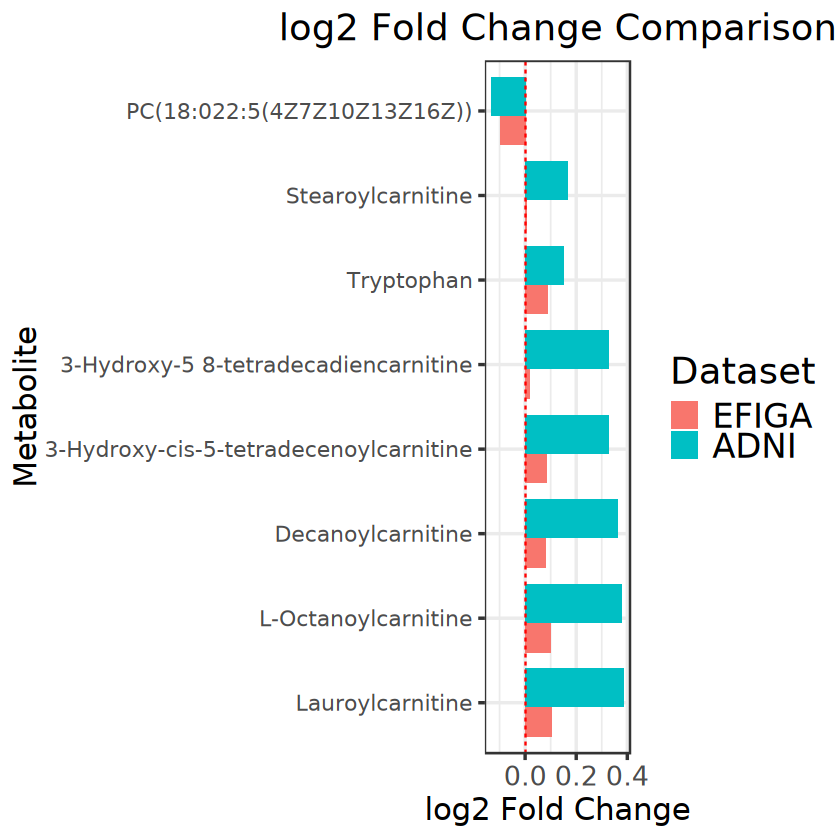

In [60]:
library(dplyr)
foldChange_long_withorigin =  foldChange_long %>% 
  mutate(
    Class = case_when(
      Metabolite %in% c("Tryptophan",
                        "3-Hydroxy-cis-5-tetradecenoylcarnitine") ~ "EMCI",
      Metabolite %in% c("Lauroylcarnitine",
                        "L-Octanoylcarnitine",
                        "Decanoylcarnitine",
                        "3-Hydroxy-5 8-tetradecadiencarnitine",
                        "Stearoylcarnitine",
                        "PC(18:022:5(4Z7Z10Z13Z16Z))") ~ "LMCI"
    )
  )

p_out = ggplot(foldChange_long_withorigin, aes(x = Metabolite, y = FoldChange, fill = Dataset)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.7)) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red") +
  theme_bw(base_size = 16) +
  #facet_wrap(~ Class, scales = "free_x", nrow = 1) +
  theme(
    axis.text.x = element_text(angle=0,hjust = 0.5, size = 16),
    axis.title = element_text(size = 18),
    plot.title = element_text(size = 22, hjust = 0.5),
    legend.title = element_text(size = 22),
    legend.text = element_text(size = 20)
  ) + coord_flip()+
  labs(title = "log2 Fold Change Comparison",
       y = "log2 Fold Change",
       x = "Metabolite")

p_out

png('Reviewer_p_out2.png',width=10,height=5,unit='in',res=300)
p_out
dev.off()

In [ ]:
cp /nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/lana_request/checkDEoverlap.ipynb /nfs/turbo/umms-lgarmire/home/yhdu/Bowei_NAS/EFIGA/Review

[1] "EMCI" "LMCI"


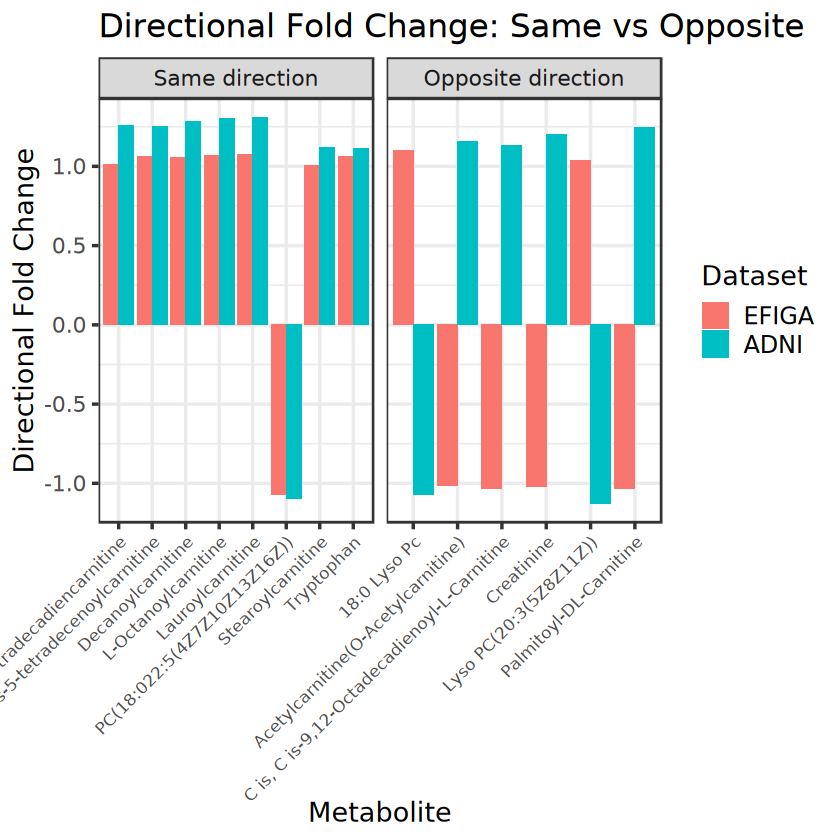

In [15]:
# For data_2 using ADNI$subtype_big, recode as before:
grouped_subtype <- ifelse(ADNI$subtype_big %in% c("EMCI1", "EMCI2"), "EMCI",
                   ifelse(ADNI$subtype_big %in% c("LMCI1", "LMCI2"), "LMCI", NA))
grouped_subtype <- factor(grouped_subtype)
print(levels(grouped_subtype))  # Expect "EMCI" and "LMCI"

# Calculate mean expression per metabolite for each group in data_2
mean_group_EMCI <- colMeans(filtered_data_2[grouped_subtype == "EMCI", ], na.rm = TRUE)
mean_group_LMCI <- colMeans(filtered_data_2[grouped_subtype == "LMCI", ], na.rm = TRUE)

# Compute log2 fold change as the difference in means (LMCI - EMCI)
logFC_data2 <- mean_group_LMCI - mean_group_EMCI

# For data_1 using EFIGA$labels_matching_UC_big:
labels_data1 <- factor(EFIGA$labels_matching_UC_big)
group1_data1 <- levels(labels_data1)[1]  # first group
group2_data1 <- levels(labels_data1)[2]  # second group

mean_group1_data1 <- colMeans(filtered_data_1[labels_data1 == group1_data1, ], na.rm = TRUE)
mean_group2_data1 <- colMeans(filtered_data_1[labels_data1 == group2_data1, ], na.rm = TRUE)

# Compute log2 fold change as the difference in means (group2 - group1)
logFC_data1 <- mean_group2_data1 - mean_group1_data1

# Convert the log2 fold change back to the original scale:
# This gives the ratio of the means (fold change)
foldChange_data2 <- 2^(logFC_data2)
foldChange_data1 <- 2^(logFC_data1)

# Now create a directional measure:
# For values < 1 (indicating downregulation), invert and multiply by -1.
directionalFC_data2 <- ifelse(foldChange_data2 < 1, -1 / foldChange_data2, foldChange_data2)
directionalFC_data1 <- ifelse(foldChange_data1 < 1, -1 / foldChange_data1, foldChange_data1)

# Create data frames for each dataset with directional fold change
directionalFC_data2_df <- data.frame(Metabolite = names(directionalFC_data2),
                                     foldChange_ADNI = directionalFC_data2,
                                     stringsAsFactors = FALSE)
directionalFC_data1_df <- data.frame(Metabolite = names(directionalFC_data1),
                                     foldChange_EFIGA = directionalFC_data1,
                                     stringsAsFactors = FALSE)

# Merge the results for side-by-side comparison
foldChange_merged <- merge(directionalFC_data1_df, directionalFC_data2_df, by = "Metabolite", all = TRUE)

# Load required libraries for reshaping and plotting
library(reshape2)
library(ggplot2)

# First, create a column indicating whether direction is the same
foldChange_merged$DirectionGroup <- ifelse(
  sign(foldChange_merged$foldChange_EFIGA) == sign(foldChange_merged$foldChange_ADNI),
  "Same direction", 
  "Opposite direction"
)

# Reorder the data so that "Same direction" appears first
foldChange_merged$DirectionGroup <- factor(
  foldChange_merged$DirectionGroup, 
  levels = c("Same direction", "Opposite direction")
)

# Sort the rows by DirectionGroup (so that all "Same direction" are first)
foldChange_merged <- foldChange_merged[order(foldChange_merged$DirectionGroup), ]

# Convert Metabolite into a factor with the new row order
foldChange_merged$Metabolite <- factor(
  foldChange_merged$Metabolite, 
  levels = foldChange_merged$Metabolite
)

# Now melt the data for plotting
library(reshape2)
foldChange_long <- melt(
  foldChange_merged,
  id.vars = c("Metabolite", "DirectionGroup"), 
  variable.name = "Dataset", 
  value.name = "FoldChange"
)

# Optionally, rename the dataset levels (if you haven't already)
levels(foldChange_long$Dataset) <- c("EFIGA", "ADNI")

library(ggplot2)
p <- ggplot(foldChange_long, aes(x = Metabolite, y = FoldChange, fill = Dataset)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  facet_wrap(~ DirectionGroup, scales = "free_x", nrow = 1) +
  theme_bw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
    axis.title = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  ) +
  labs(title = "Directional Fold Change: Same vs Opposite",
       y = "Directional Fold Change",
       x = "Metabolite")

print(p)

# Save the plot as a PNG file with specified dimensions and resolution
ggsave("logFC_comparison_abs.png", plot = p, width = 12, height = 8, dpi = 600)



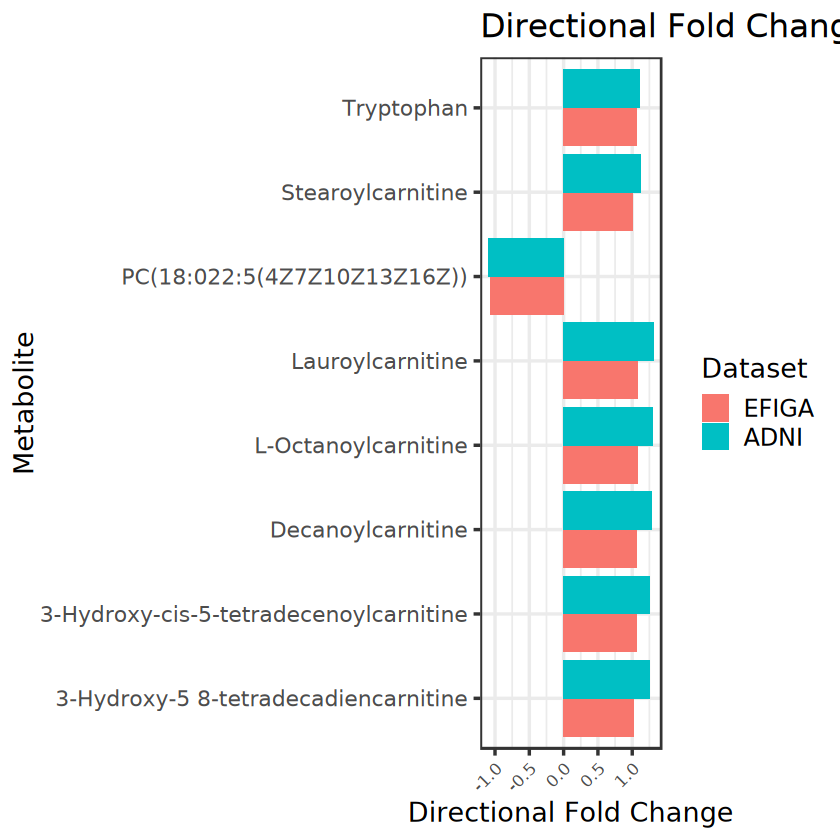

In [19]:
library(ggplot2)
p <- ggplot(
foldChange_long[foldChange_long$DirectionGroup=='Same direction',], aes(x = Metabolite, y = FoldChange, fill = Dataset)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  #facet_wrap(~ DirectionGroup, scales = "free_x", nrow = 1) +
  theme_bw(base_size = 16) +coord_flip()+
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
    axis.title = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  ) +
  labs(title = "Directional Fold Change: Same vs Opposite",
       y = "Directional Fold Change",
       x = "Metabolite")

print(p)

In [20]:
lmci_limma

ERROR: Error in eval(expr, envir, enclos): object 'lmci_limma' not found


In [32]:
directionalFC_data2

Lauroylcarnitine 
                                   1.306448 
C is, C is-9,12-Octadecadienoyl-L-Carnitine 
                                   1.131470 
                        L-Octanoylcarnitine 
                                   1.298678 
     3-Hydroxy-cis-5-tetradecenoylcarnitine 
                                   1.253385 
       3-Hydroxy-5 8-tetradecadiencarnitine 
                                   1.255547 
                     Palmitoyl-DL-Carnitine 
                                   1.247159 
                          Stearoylcarnitine 
                                   1.121703 
         Acetylcarnitine(O-Acetylcarnitine) 
                                   1.155303 
                          Decanoylcarnitine 
                                   1.283738 
                               18:0 Lyso Pc 
                                  -1.073298 
                     Lyso PC(20:3(5Z8Z11Z)) 
                                  -1.126407 
                PC(18:022:5(4Z7Z10Z13Z16Z)) 
                                  -1.095546 
                                 Tryptophan 
                                   1.110756 
                                 Creatinine 
                                   1.201499

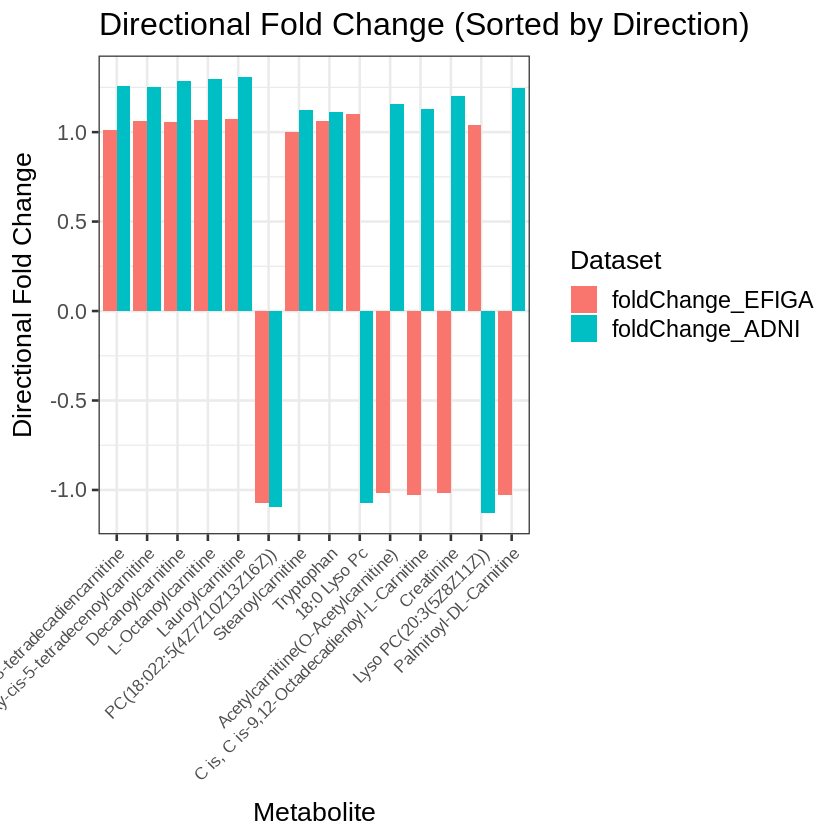

In [31]:
# After creating 'DirectionGroup' (as above) and sorting:
# We already have foldChange_merged sorted by direction.

foldChange_long <- melt(
  foldChange_merged,
  id.vars = c("Metabolite", "DirectionGroup"), 
  variable.name = "Dataset", 
  value.name = "FoldChange"
)

# Single panel but the x-axis is now sorted by direction
p <- ggplot(foldChange_long, aes(x = Metabolite, y = FoldChange, fill = Dataset)) +
  geom_bar(stat = "identity", position = position_dodge()) +
  theme_bw(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 10),
    axis.title = element_text(size = 16),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 14)
  ) +
  labs(title = "Directional Fold Change (Sorted by Direction)",
       y = "Directional Fold Change",
       x = "Metabolite")

print(p)


In [28]:
logFC_long

Metabolite,Dataset,LogFC
<chr>,<fct>,<dbl>
18:0 Lyso Pc,EFIGA,1.0990444
3-Hydroxy-5 8-tetradecadiencarnitine,EFIGA,1.0123294
3-Hydroxy-cis-5-tetradecenoylcarnitine,EFIGA,1.0598631
Acetylcarnitine(O-Acetylcarnitine),EFIGA,0.9842222
"C is, C is-9,12-Octadecadienoyl-L-Carnitine",EFIGA,0.9711561
Creatinine,EFIGA,0.9820540
Decanoylcarnitine,EFIGA,1.0561718
L-Octanoylcarnitine,EFIGA,1.0704412
Lauroylcarnitine,EFIGA,1.0740896


In [17]:
library(dplyr)

result <- logFC_long %>%
  group_by(Metabolite) %>%
  # Ensure there is more than one unique Dataset for the metabolite
  filter(n_distinct(Dataset) > 1) %>%
  # Keep groups where all LogFC values are either positive or negative
  filter(all(LogFC > 0) | all(LogFC < 0)) %>%
  ungroup()

# View the filtered data
unique(result$Metabolite)


[1] "3-Hydroxy-5 8-tetradecadiencarnitine"  
[2] "3-Hydroxy-cis-5-tetradecenoylcarnitine"
[3] "Decanoylcarnitine"                     
[4] "L-Octanoylcarnitine"                   
[5] "Lauroylcarnitine"                      
[6] "PC(18:022:5(4Z7Z10Z13Z16Z))"           
[7] "Stearoylcarnitine"                     
[8] "Tryptophan"